## Creating Image Dataset from Google Image

### Downloading the urls

Open ```https://images.google.com/``` and search the images. Open the browser's web console, and enter the following javascript command to download the urls in a csv file.

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

Save the file to ```data``` folder.

In [1]:
import os
import fastai as f
import fastai.vision as fv

In [2]:
!ls ../../../data/bikes

city_bikes.txt	folding_bikes.txt  mountain_bikes.txt  road_bikes.txt


In [3]:
files = os.listdir('../../../data/bikes')
files

['city_bikes.txt', 'road_bikes.txt', 'folding_bikes.txt', 'mountain_bikes.txt']

In [4]:
for file in files:
    root_folder_path = '../../../data/bikes'
    file_path = f'{root_folder_path}/{file}'
    folder = file.replace('_bikes.txt', '')
    dest = f'{root_folder_path}/{folder}'
    fv.download_images(file_path, dest, max_pics=200)


 Download of https://upload.ecvv.com/upload/Product/20128/Taiwan_Pink_dutch_city_bicycle_Lady_city_bikes_28_omafiets2012851759121.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p /root/.fastai/data
$ cd /root/.fastai/data
$ wget -c https://upload.ecvv.com/upload/Product/20128/Taiwan_Pink_dutch_city_bicycle_Lady_city_bikes_28_omafiets2012851759121.jpg
$ tar -zxvf Taiwan_Pink_dutch_city_bicycle_Lady_city_bikes_28_omafiets2012851759121.jpg

And re-run your code once the download is successful



Error https://www.pictoncycles.co.uk/images/Syssix2019durastd.jpg HTTPSConnectionPool(host='www.pictoncycles.co.uk', port=443): Max retries exceeded with url: /images/Syssix2019durastd.jpg (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f460324b9b0>, 'Connection to www.pictoncycles.co.uk timed out. (connect timeout=4)'))


Error https://media.performancebike.com/images/performance/products/product-hi/31-9642-WHI-ANGLE.JPG?resize=415px:415px&output-quality=85 HTTPSConnectionPool(host='media.performancebike.com', port=443): Max retries exceeded with url: /images/performance/products/product-hi/31-9642-WHI-ANGLE.JPG?resize=415px:415px&output-quality=85 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f4602a02748>: Failed to establish a new connection: [Errno -2] Name or service not known',))


### Create the list of classes

In [5]:
!ls ../../../data/bikes/

city		folding		   mountain	       road
city_bikes.txt	folding_bikes.txt  mountain_bikes.txt  road_bikes.txt


In [6]:
root_path = '../../../data/bikes'
classes = []
for item in os.listdir(root_path):
    if os.path.isdir(f'{root_path}/{item}'):
        classes.append(item)

In [7]:
classes

['mountain', 'road', 'folding', 'city']

### Verify the items

In [8]:
for bike in classes:
    print('---------------------------------------------------------')
    print(bike)
    fv.verify_images(f'{root_path}/{bike}', delete=True, max_size=500)

---------------------------------------------------------
mountain


cannot identify image file <_io.BufferedReader name='../../../data/bikes/mountain/00000042.jpg'>
cannot identify image file <_io.BufferedReader name='../../../data/bikes/mountain/00000046.jpg'>
cannot identify image file <_io.BufferedReader name='../../../data/bikes/mountain/00000075.jpg'>
---------------------------------------------------------
road


cannot identify image file <_io.BufferedReader name='../../../data/bikes/road/00000009.jpg'>
cannot identify image file <_io.BufferedReader name='../../../data/bikes/road/00000086.jpg'>
---------------------------------------------------------
folding


cannot identify image file <_io.BufferedReader name='../../../data/bikes/folding/00000071.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:1022: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


---------------------------------------------------------
city


cannot identify image file <_io.BufferedReader name='../../../data/bikes/city/00000048.jpg'>
cannot identify image file <_io.BufferedReader name='../../../data/bikes/city/00000085.jpg'>
cannot identify image file <_io.BufferedReader name='../../../data/bikes/city/00000093.jpg'>
cannot identify image file <_io.BufferedReader name='../../../data/bikes/city/00000047.jpg'>


### Create the data bunch and look at the data

In [9]:
data = fv.ImageDataBunch.from_folder(
    root_path,
    train='.',
    valid_pct=0.2,
    ds_tfms=fv.get_transforms(),
    size=224
)

In [10]:
data.normalize(fv.imagenet_stats)

ImageDataBunch;

Train: LabelList (308 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
mountain,mountain,mountain,mountain,mountain
Path: ../../../data/bikes;

Valid: LabelList (77 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
mountain,folding,folding,folding,road
Path: ../../../data/bikes;

Test: None

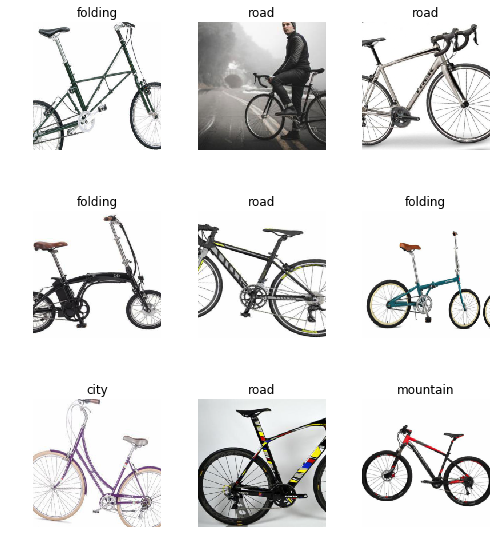

In [11]:
data.show_batch(rows=3, figsize=(7,8))

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['city', 'folding', 'mountain', 'road'], 4, 308, 77)

### Train

In [14]:
learn = fv.create_cnn(data, fv.models.resnet34, metrics=f.metrics.error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:16, 5176470.06it/s]


In [15]:
learn.fit_one_cycle(4)

In [16]:
learn.save('stage-1')

In [17]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (308 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
mountain,mountain,mountain,mountain,mountain
Path: ../../../data/bikes;

Valid: LabelList (77 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
mountain,folding,folding,folding,road
Path: ../../../data/bikes;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, mome

In [18]:
learn.unfreeze()

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


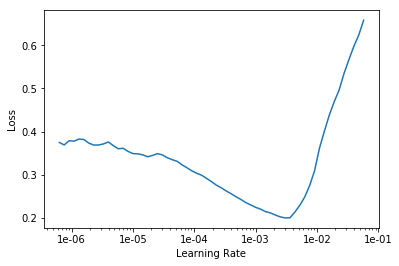

In [20]:
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-3))

In [22]:
learn.save('stage-2')

### Interpretation

In [23]:
interp = fv.learner.ClassificationInterpretation.from_learner(learn)

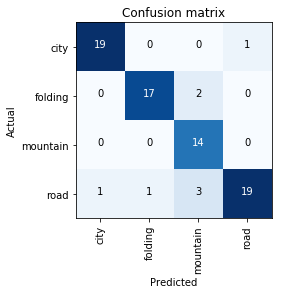

In [24]:
interp.plot_confusion_matrix()

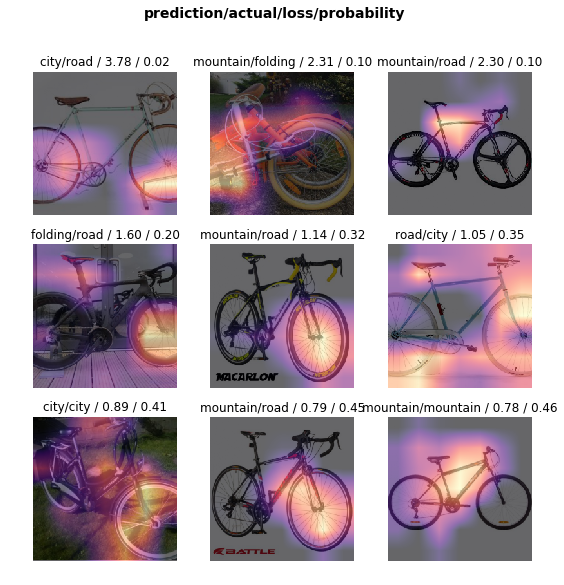

In [26]:
interp.plot_top_losses(9, figsize=(9,9))

### Cleaning up

One possibility of big losses is that the images might actually should not be in our dataset. We can use ```ImageCleaner``` from ```fastai.widgets``` module.

In [27]:
import fastai.widgets as fw

First we need to get the file paths of the top losses using ```DatasetFormatter```.

In [28]:
ds, idxs = fw.DatasetFormatter.from_toplosses(learn, ds_type=f.basic_data.DatasetType.Valid)

In [30]:
path = fv.Path(root_path)

In [31]:
fw.ImageCleaner(ds, idxs, path)

'No images to show :)'

The cleaned data is saved in ```cleaned.csv``` file in the ```path``` we feed to the ```ImageCleaner```.

In [32]:
!ls ../../../data/bikes

city		folding		   mountain	       road_bikes.txt
city_bikes.txt	folding_bikes.txt  mountain_bikes.txt
cleaned.csv	models		   road


### Train with cleaned data

In [41]:
cleaned = fv.ImageDataBunch.from_csv(path, csv_labels='cleaned.csv', ds_tfms=fv.get_transforms(), size=224)

In [42]:
cleaned.normalize(fv.imagenet_stats)

ImageDataBunch;

Train: LabelList (222 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
mountain,mountain,mountain,mountain,mountain
Path: ../../../data/bikes;

Valid: LabelList (55 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
mountain,folding,folding,mountain,city
Path: ../../../data/bikes;

Test: None

In [43]:
learn_cleaned = fv.create_cnn(cleaned, fv.models.resnet34, metrics=f.metrics.error_rate)

In [44]:
learn_cleaned.fit_one_cycle(4)

In [45]:
learn_cleaned.save('stage-1')

In [46]:
learn_cleaned.unfreeze()

In [47]:
learn_cleaned.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


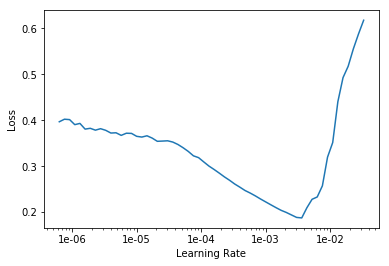

In [48]:
learn_cleaned.recorder.plot()

In [49]:
learn_cleaned.fit_one_cycle(2, max_lr=slice(1e-6, 1e-3))

In [50]:
learn_cleaned.save('stage-2')

### Putting the model in production

Export the model for production.

In [51]:
learn_cleaned.export()

In [53]:
!ls $root_path

city		export.pkl	   models	       road
city_bikes.txt	folding		   mountain	       road_bikes.txt
cleaned.csv	folding_bikes.txt  mountain_bikes.txt


The ```export.pkl``` is created in our dataset folder and we will load it for production.

In [54]:
predictor = fv.load_learner(path)

example image

In [61]:
from PIL import Image
import urllib.request as request

In [62]:
url = 'https://www.picclickimg.com/d/w1600/pict/113661158791_/Masi-Gran-Criterium-Classic-Road-Bike-1974.jpg'
img = Image.open(request.urlopen(url))

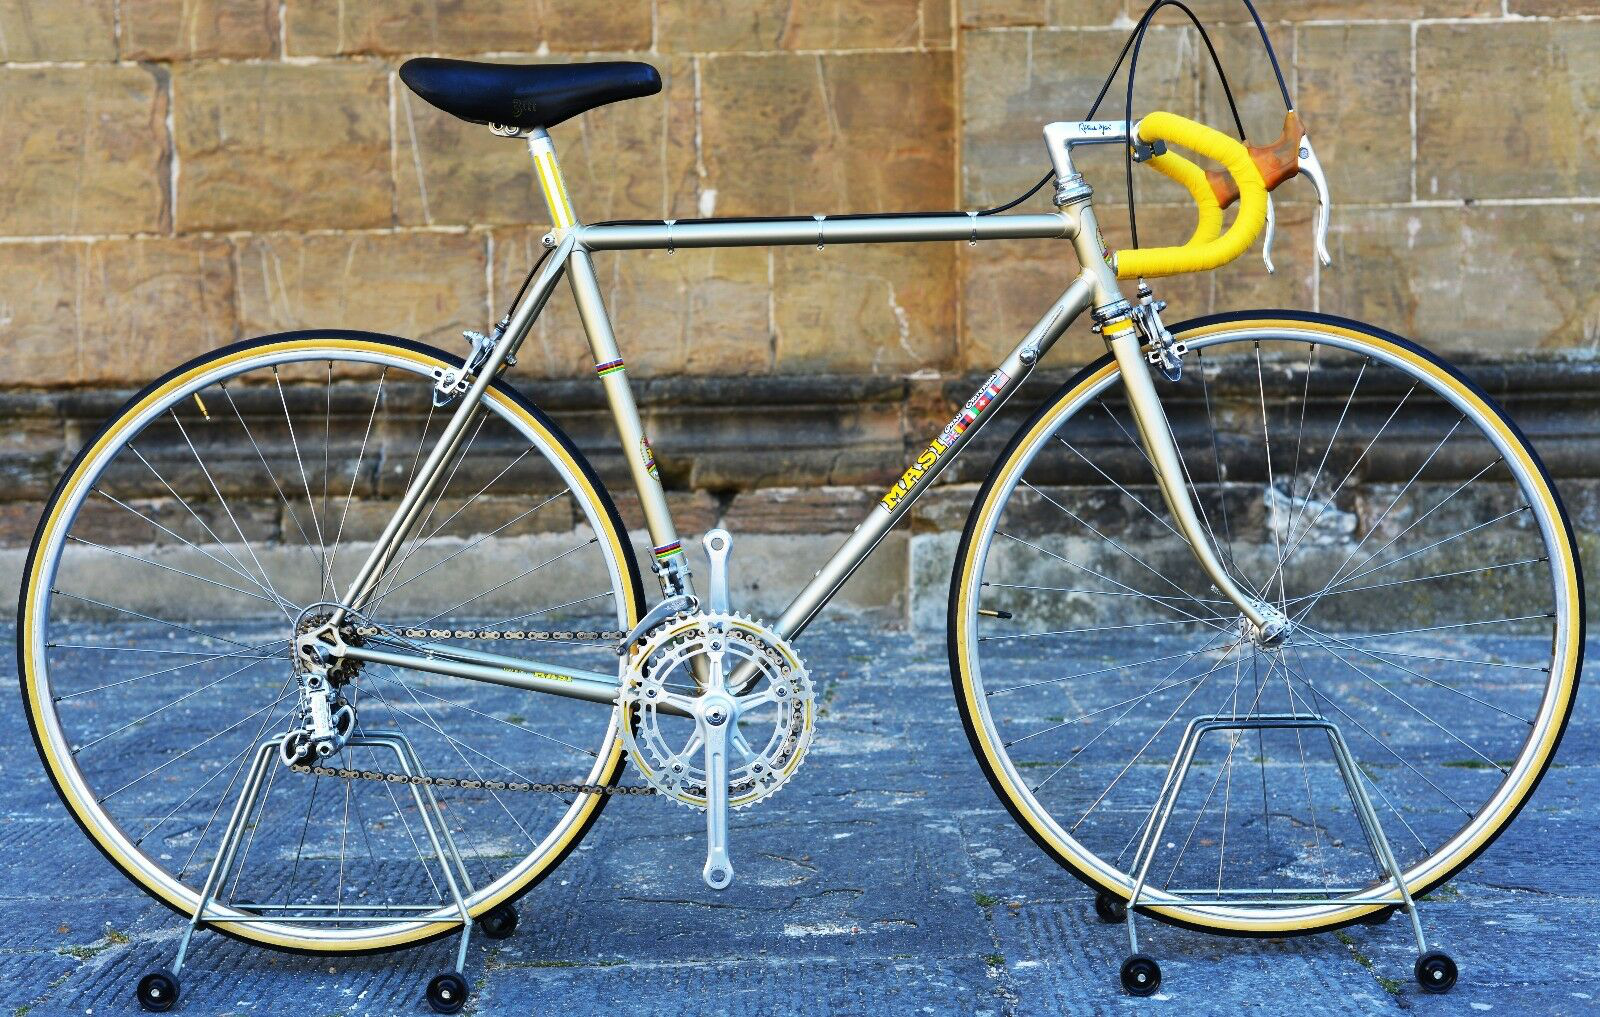

In [63]:
img

In [65]:
predictor.predict(img)

AttributeError: 'JpegImageFile' object has no attribute 'apply_tfms'